## Proyecto Ciencia de Datos en Python Fabián Hernández 1803299

Importo paquetes necesarios para el proyecto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargo datos usando la funcion load de numpy 
data = np.load('proyecto_training_data.npy')
mascara = np.random.rand(len(data)) <= 0.8
data_training = data[mascara]
data_test = data[~mascara]

Obtengo datos de cada columna del dataset

In [3]:
sale_price = data_training[:,0]
OverallQual = data_training[:,1]
stFLsf = data_training[:,2]
TotalRmsAbvGrd = data_training[:,3]
YearBuilt = data_training[:,4]
LotFrontage = data_training[:,5]
newLotFrontage = LotFrontage[~np.isnan(LotFrontage)]

3. Obtengo media, maximo, minimo, rango y desviacion estandar de cada dato 

In [4]:
list_mean = [np.mean(sale_price),np.mean(OverallQual),np.mean(stFLsf),np.mean(TotalRmsAbvGrd),np.mean(YearBuilt),np.nanmean(newLotFrontage)]
list_max = [np.max(sale_price),np.max(OverallQual),np.max(stFLsf),np.max(TotalRmsAbvGrd),np.max(YearBuilt),np.nanmax(newLotFrontage)]
list_min = [np.min(sale_price),np.min(OverallQual),np.min(stFLsf),np.min(TotalRmsAbvGrd),np.min(YearBuilt),np.nanmin(newLotFrontage)]
list_range = [np.ptp(sale_price),np.ptp(OverallQual),np.ptp(stFLsf),np.ptp(TotalRmsAbvGrd),np.ptp(YearBuilt),np.ptp(newLotFrontage)]
list_std = [np.std(sale_price),np.std(OverallQual),np.std(stFLsf),np.std(TotalRmsAbvGrd),np.std(YearBuilt),np.nanstd(newLotFrontage)]
list_campos = ["Property's sale price in dollars","Overall material and finish quality","First Floor square feet","Total rooms above grade","Original construction date","Linear feet of street connected to property"]
for x in range(0,6):
    print(f"Para el campo {list_campos[x]} la media es de: {list_mean[x]}, el valor maximo es de {list_max[x]}, el valor minimo es de {list_min[x]}, el rango es de {list_range[x]}, la desviacion estandar es de: {list_std[x]}\n")


 

Para el campo Property's sale price in dollars la media es de: 179970.9601357082, el valor maximo es de 755000.0, el valor minimo es de 34900.0, el rango es de 720100.0, la desviacion estandar es de: 79425.33745572098

Para el campo Overall material and finish quality la media es de: 6.080576759966073, el valor maximo es de 10.0, el valor minimo es de 1.0, el rango es de 9.0, la desviacion estandar es de: 1.3934735821288269

Para el campo First Floor square feet la media es de: 1153.6726039016116, el valor maximo es de 4692.0, el valor minimo es de 334.0, el rango es de 4358.0, la desviacion estandar es de: 389.69151326272913

Para el campo Total rooms above grade la media es de: 6.472434266327396, el valor maximo es de 14.0, el valor minimo es de 2.0, el rango es de 12.0, la desviacion estandar es de: 1.5823062461280188

Para el campo Original construction date la media es de: 1971.0288379983037, el valor maximo es de 2010.0, el valor minimo es de 1872.0, el rango es de 138.0, la desv

4. Para cada variable en el dataset usar seaborn(función distplot para graficar un histograma de la variable)

[Text(0.5, 1.0, "Property's sale price in dollars")]

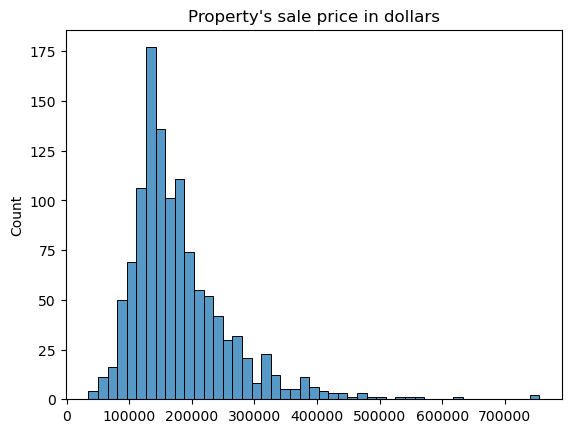

In [5]:
sns.histplot(data=sale_price).set(title="Property's sale price in dollars")


[Text(0.5, 1.0, 'Overall material and finish quality')]

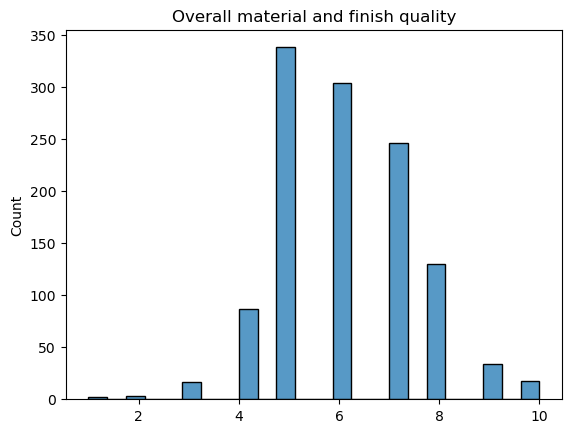

In [6]:
sns.histplot(data=OverallQual).set(title='Overall material and finish quality')

[Text(0.5, 1.0, 'First Floor square feet')]

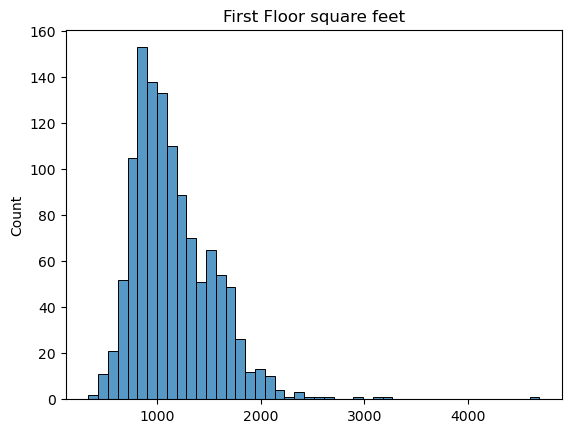

In [7]:
sns.histplot(data=stFLsf).set(title='First Floor square feet')

[Text(0.5, 1.0, 'Total rooms above grade')]

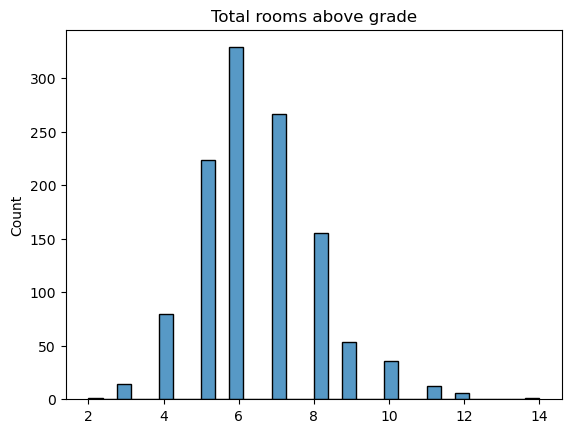

In [8]:
sns.histplot(data=TotalRmsAbvGrd).set(title='Total rooms above grade')

[Text(0.5, 1.0, 'Original construction date')]

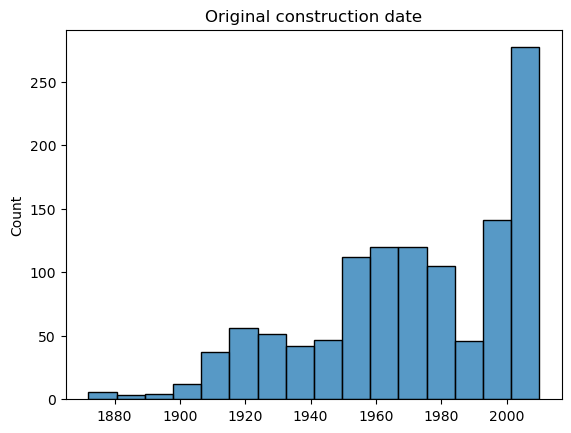

In [9]:
sns.histplot(data=YearBuilt).set(title='Original construction date')

[Text(0.5, 1.0, 'Linear feet of street connected to property')]

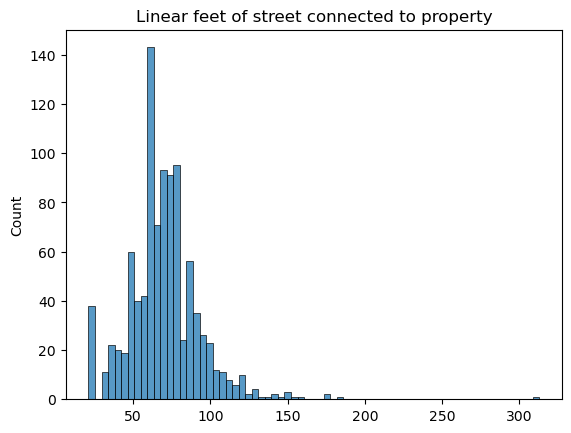

In [10]:
sns.histplot(data=newLotFrontage).set(title='Linear feet of street connected to property')

5. Para cada variable independiente x :
- Calcular el coeficiente de correlación entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
    con más potencial predictivo es decir las 2 variables que presentan mayor correlación
    entre dicha variable y la variable dependiente

### Calculamos coeficiente de correlacion

In [11]:
#Convierto a un dataframe de pandas dado que en numpy no da un unico coeficiente de correlacion 
df = pd.DataFrame(data_training,columns=['Sale Price','OverallQual','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)

      Sale Price  OverallQual  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       208500.0          7.0     856.0             8.0     2003.0   
1       181500.0          6.0    1262.0             6.0     1976.0   
2       223500.0          7.0     920.0             6.0     2001.0   
3       140000.0          7.0     961.0             7.0     1915.0   
4       143000.0          5.0     796.0             5.0     1993.0   
...          ...          ...       ...             ...        ...   
1174    175000.0          6.0     953.0             7.0     1999.0   
1175    210000.0          6.0    2073.0             7.0     1978.0   
1176    266500.0          7.0    1188.0             9.0     1941.0   
1177    142125.0          5.0    1078.0             5.0     1950.0   
1178    147500.0          5.0    1256.0             6.0     1965.0   

      LotFrontage  
0            65.0  
1            80.0  
2            68.0  
3            60.0  
4            85.0  
...           ...  
1174         62.0  

In [12]:
corr1 = df['Sale Price'].corr(df['OverallQual'])    # Coeficiente de Correlacion SalePrice vs OverallQual
corr2 = df['Sale Price'].corr(df['1stFlrSF'])       # Coeficiente de Correlacion SalePrice vs 1stFlrSF
corr3 = df['Sale Price'].corr(df['YearBuilt'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr4 = df['Sale Price'].corr(df['LotFrontage'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr5 = df['Sale Price'].corr(df['TotalRmsAbvGrd'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
print(f"El coeficiente de correlacion entre Sale Price y OverallQual es de: {corr1}")
print(f"El coeficiente de correlacion entre Sale Price y First Floor square feet es de: {corr2}")
print(f"El coeficiente de correlacion entre Sale Price y Year Built es de: {corr3}")
print(f"El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: {corr4}")
print(f"El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: {corr5}")


El coeficiente de correlacion entre Sale Price y OverallQual es de: 0.7908896676596845
El coeficiente de correlacion entre Sale Price y First Floor square feet es de: 0.6200544966669405
El coeficiente de correlacion entre Sale Price y Year Built es de: 0.510402441805872
El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: 0.3409684268158316
El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: 0.5210487131911876


### Graficar x vs y(scatterplot) usando matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

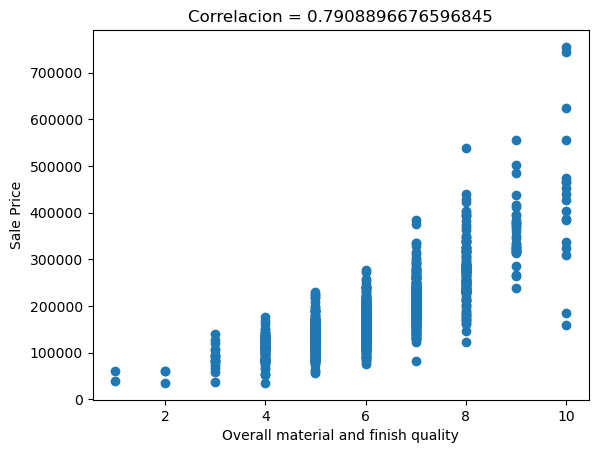

In [13]:
plt.scatter(OverallQual,sale_price)
plt.title(f"Correlacion = {corr1}")
plt.xlabel("Overall material and finish quality")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

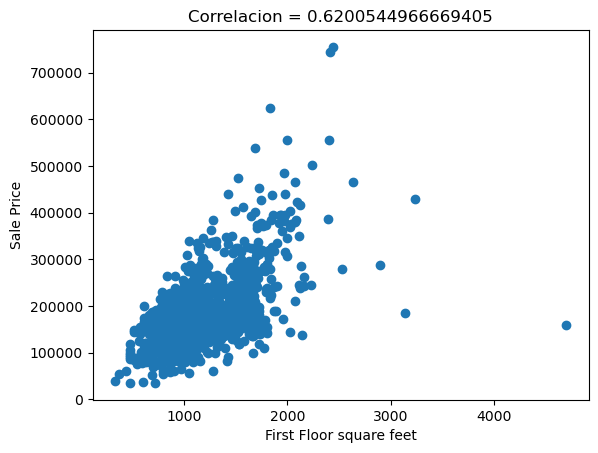

In [14]:
plt.scatter(stFLsf,sale_price)
plt.title(f"Correlacion = {corr2}")
plt.xlabel("First Floor square feet")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

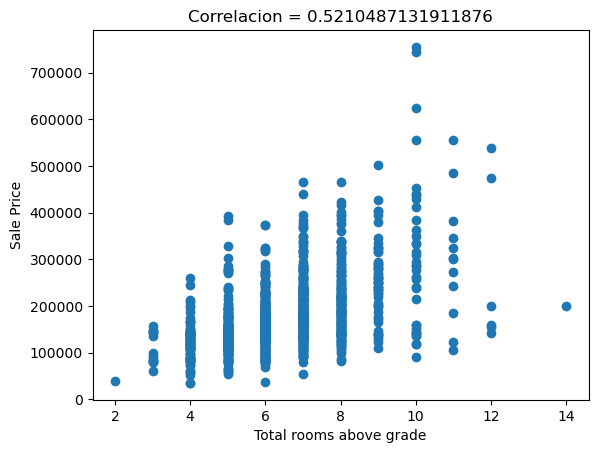

In [15]:
plt.scatter(TotalRmsAbvGrd,sale_price)
plt.title(f"Correlacion = {corr5}")
plt.xlabel("Total rooms above grade")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

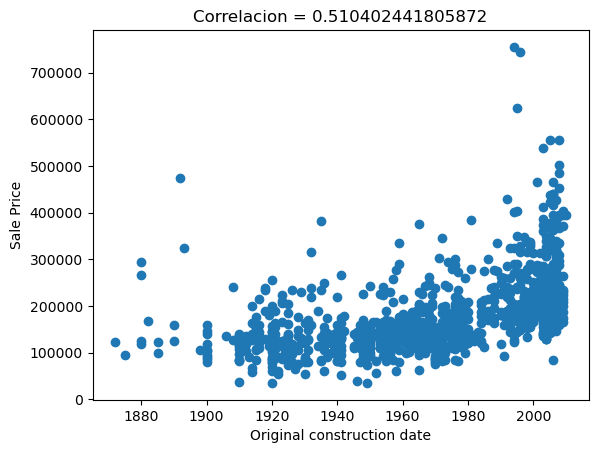

In [16]:
plt.scatter(YearBuilt,sale_price)
plt.title(f"Correlacion = {corr3}")
plt.xlabel("Original construction date")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

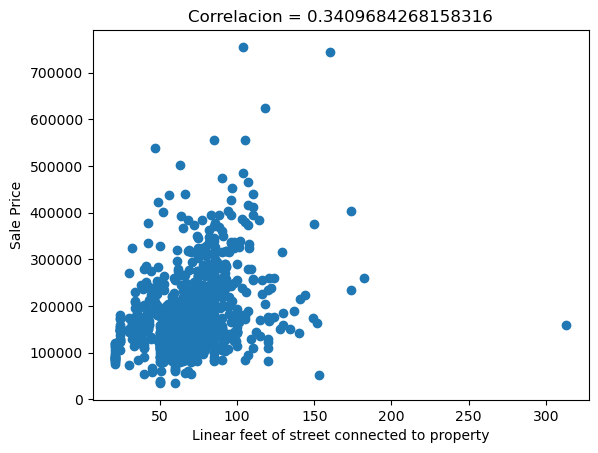

In [17]:
plt.scatter(LotFrontage,sale_price)
plt.title(f"Correlacion = {corr4}")
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Sale Price")
plt.show

#### Dado las graficas anteriores junto con el coeficiente de correlacion las dos variables con mas potencial predictivo para la variable Sale Price son OverallQual(Overall material and finish quality) y First Floor square feet por lo que los modelos se implementaran en base a estas dos variables 

## Se empieza a trabajar con programacion orientada a objetos

In [116]:
class Modelo:
    def __init__(self,varx,vary,epochs,print_error_every, learning_rate):
        self.varx = varx
        self.vary = vary
        self.epochs = epochs
        self.print_error_every = print_error_every
        self.learning_rate = learning_rate
        self.b1 = 0.1
        self.b0 = 0.2
        self.betas = np.array([self.b1,self.b0])
        vect1 = np.ones_like(self.varx).reshape(-1,1)
        self.varx = np.reshape(self.varx,(-1,1))
        self.A = np.hstack([self.varx,vect1])  
        self.dic_modelos = {}
        self.dic_errores = {}
        self.error = 0
    def __repr__(self):
        return f"{self.A}"
    def iter_for_betas(self):
        for iter in range(self.epochs):
            yEstimada = np.dot(self.A,self.betas) 
            self.error = np.mean(1/2*np.power(yEstimada-self.vary,2)) # Calculo error

            deltas = np.mean(np.multiply(self.A,(yEstimada-self.vary).reshape((-1,1))),axis=0)
            deltas = self.learning_rate*deltas
            self.betas[0] = self.betas[0] - deltas[0]
            self.betas[1] = self.betas[1] - deltas[1]
            
            #Instruccion 6.4
            if(iter%self.print_error_every == 0):
                print(f"El error es de: {self.error} para la iteracion: {iter}")
                
                
            #Almacenamos modelo resultante junto con error en cada iteracion, cada uno en su diccionario por separado 
            self.dic_modelos[iter] = self.betas
            self.dic_errores[iter] = self.error
            

    def obtain_last_error(self):
        return self.error
    
    def obtain_last_betas(self):
        return self.betas
    
    def obtain_dict_betas(self):
        return self.dic_modelos
    
    def obtain_dict_errores(self):
        return self.dic_errores



In [117]:
Modelo1 = Modelo(OverallQual,sale_price,100001,1000,0.01)
Modelo2 = Modelo(stFLsf,sale_price,261,1,0.000000001)

In [118]:
Modelo1.iter_for_betas()

El error es de: 19348811181.144073 para la iteracion: 0
El error es de: 1273092131.7344894 para la iteracion: 1000
El error es de: 1215898019.4692519 para la iteracion: 2000
El error es de: 1194311315.6390977 para la iteracion: 3000
El error es de: 1186163872.4181976 para la iteracion: 4000
El error es de: 1183088792.8896103 para la iteracion: 5000
El error es de: 1181928169.3846953 para la iteracion: 6000
El error es de: 1181490116.6749558 para la iteracion: 7000
El error es de: 1181324782.976562 para la iteracion: 8000
El error es de: 1181262381.2810206 para la iteracion: 9000
El error es de: 1181238829.0854044 para la iteracion: 10000
El error es de: 1181229939.809023 para la iteracion: 11000
El error es de: 1181226584.7403123 para la iteracion: 12000
El error es de: 1181225318.440833 para la iteracion: 13000
El error es de: 1181224840.502969 para la iteracion: 14000
El error es de: 1181224660.1154659 para la iteracion: 15000
El error es de: 1181224592.0320315 para la iteracion: 160

In [119]:
Modelo2.iter_for_betas()

El error es de: 19326254893.211197 para la iteracion: 0
El error es de: 19274913395.2324 para la iteracion: 1
El error es de: 19223724044.85341 para la iteracion: 2
El error es de: 19172686391.193493 para la iteracion: 3
El error es de: 19121799984.70808 para la iteracion: 4
El error es de: 19071064377.184803 para la iteracion: 5
El error es de: 19020479121.73954 para la iteracion: 6
El error es de: 18970043772.812485 para la iteracion: 7
El error es de: 18919757886.164215 para la iteracion: 8
El error es de: 18869621018.87181 para la iteracion: 9
El error es de: 18819632729.324913 para la iteracion: 10
El error es de: 18769792577.221836 para la iteracion: 11
El error es de: 18720100123.565727 para la iteracion: 12
El error es de: 18670554930.66067 para la iteracion: 13
El error es de: 18621156562.10782 para la iteracion: 14
El error es de: 18571904582.8016 para la iteracion: 15
El error es de: 18522798558.925816 para la iteracion: 16
El error es de: 18473838057.949886 para la iteracio

In [120]:
beta1 = Modelo1.obtain_last_betas()
beta1

array([ 45079.20318672, -94136.59511924])

In [121]:
beta2 = Modelo2.obtain_last_betas()
beta2

array([49.18706106,  0.23910445])